<a href="https://colab.research.google.com/github/santhosh1728/FML/blob/main/ML_CODE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('boston_house_prices.csv')
print(df.head(5))
print(df.shape)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
(506, 14)


In [ ]:
from sklearn.model_selection import train_test_split

X, Y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_test.shape)
print(Y_train.shape)


(152, 13)
(354,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_=MinMaxScaler()
X_train_norm=mm_.fit_transform(X_train)
X_test_norm=mm_.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

sd_=StandardScaler()
X_train_std=sd_.fit_transform(X_train)
X_test_std=sd_.fit_transform(X_test)


Linear Regression Code from scratch

In [ ]:
#as it is batch gd only one loop is running
def linear_regression_regression_GD(features,target_,n_iter=20,learning_rate=0.001):
  B=np.zeros(1+features.shape[1])
  #B=np.zeros(features.shape[1])
  cost=[]
  for i in range(n_iter):
    out_=np.dot(features,B[1:])+B[0]
    #out_=np.dot(features,B)
    Error_=out_-target_
    del_B=np.dot(features.T,Error_)
    B=B-learning_rate*np.sum(Error_)
    #B[1:]-=learning_rate*del_B
    #B[0]=B[0]-learning_rate*Error_.sum()
    cost_val-(Error_**2).sum()/2
    cost.append(cost_val)
  return B,cost

Take house price data and split it into train and test and split train 80% and test 20% and random_stte=1 and apply the given function to train the model and plot the graph for error of training and test data.

(152, 13)
(354,)
(354, 13)
(152,)


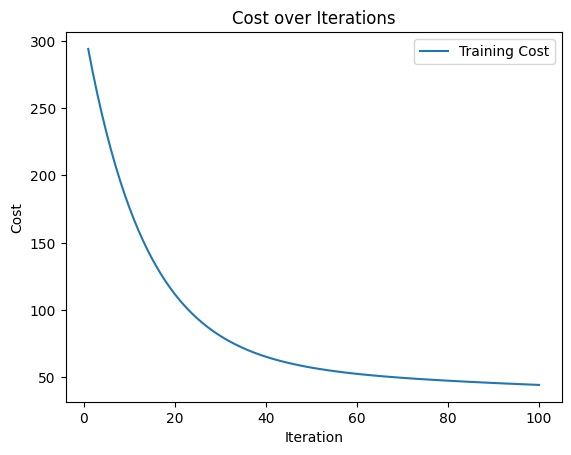

In [ ]:
from sklearn.model_selection import train_test_split
X, Y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_test.shape)
print(Y_train.shape)
print(X_train.shape)
print(Y_test.shape)
def linear_regression_regression_GD(features, target_, n_iter=20, learning_rate=0.001):
    B = np.zeros(1 + features.shape[1])
    cost = []

    for i in range(n_iter):
        out_ = np.dot(features, B[1:]) + B[0]
        Error_ = out_ - target_
        del_B = np.dot(features.T, Error_)

        B[1:] -= learning_rate * del_B / len(features)
        B[0] -= learning_rate * Error_.sum() / len(features)

        cost_val = (Error_ ** 2).sum() / (2 * len(features))
        cost.append(cost_val)

    return B, cost
    B, cost_train = linear_regression_regression_GD(X_train_norm, Y_train, n_iter=100, learning_rate=0.01)
    def predict(features, coefficients):
      return np.dot(features, coefficients[1:]) + coefficients[0]

Y_train_pred = predict(X_train_norm, B)
Y_test_pred = predict(X_test_norm, B)
plt.plot(range(1, len(cost_train) + 1), cost_train, label='Training Cost')
plt.title('Cost over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()



For X_tain [500,13] with mini batch as[10,13]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('boston_house_prices.csv')

X, Y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, _, Y_train, _ = train_test_split(X, Y, train_size=500, random_state=1)

mm_ = MinMaxScaler()
X_train_norm = mm_.fit_transform(X_train)

def mini_batch_gradient_descent(features, target, n_iter=100, learning_rate=0.01, batch_size=10):
    B = np.zeros(features.shape[1] + 1)
    for epoch in range(n_iter):
        indices = np.random.permutation(features.shape[0])
        features_shuffled = features[indices]
        target_shuffled = target[indices]

        for i in range(0, features.shape[0], batch_size):
            X_batch = features_shuffled[i:i + batch_size]
            Y_batch = target_shuffled[i:i + batch_size]

            out_ = np.dot(X_batch, B[1:]) + B[0]
            error_ = out_ - Y_batch
            del_B = np.dot(X_batch.T, error_)

            B[1:] -= learning_rate * del_B / batch_size
            B[0] -= learning_rate * error_.sum() / batch_size

    return B

B = mini_batch_gradient_descent(X_train_norm, Y_train, n_iter=100, learning_rate=0.01, batch_size=10)


Polynomial Regression

(50,)


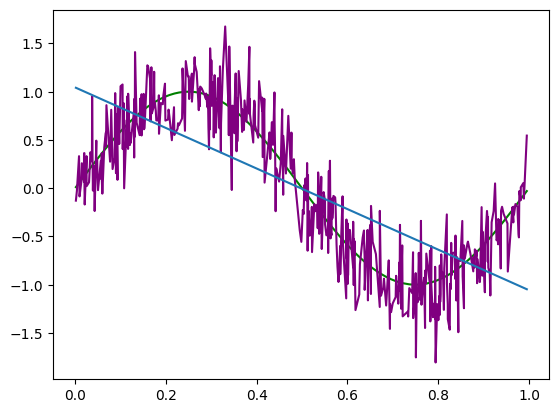

(50, 6)


NameError: name 'L_1' is not defined

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
#if we want same of set values to be generated each time we run the code
np.random.seed(10)
#from range of 0 to 1 it will give 500 value which are equally probable that is uniform distribution arranged in ascending order
X_=np.sort(np.random.uniform(low=0.0,high=1.0,size=500))
#pure sin waveform
Y_=np.sin(2*np.pi*X_)
#to add random noise using normal distribution which is same as gaussian distribution; scale provide the value of standard deviation and mean is not mentioned so it is zero
#number of noise members are same as Y_
noise_=np.random.normal(scale=0.3,size=Y_.shape)
#noisy sine wave with 500 samples
YY_=Y_+noise_
#to split the training and testing data manually
random.seed(10)
#from the range of 0 to 499 we want 500 sample randomly and non-repeating indices will be shuffled due to random.sample
ind_=random.sample(range(500),500)
#taking first 50 samples
#indices will be shuffled
ind_train=ind_[:50]
#sub_features
X_sub_train=X_[ind_train]
#the YY_ values will be of those X_ which has come in X_sub_train
YY_sub_train=YY_[ind_train]
print(X_sub_train.shape)###[50,] means it is a ID array with 50 elements
#print(YY_sub_train.shape)

#Linear Regression
#M=1
from sklearn.linear_model import LinearRegression
L1_=LinearRegression()
#optimizing the values of beta with the training data
#1 feature so 2 beta value
#.fit implies that this is training process
L1_.fit(X_sub_train[:,np.newaxis],YY_sub_train)
#after finding beta we do prdiction which is testing process
predictions=L1_.predict(X_[:,np.newaxis])##colon means we will get that many rows as in X and is used to convert the array into an matrix
##no changes are done with output as there is multiple features but the target is only one in case of regression
plt.plot(X_,Y_,color='red')
plt.plot(X_,YY_,color='purple')
plt.plot(X_,predictions)
plt.show()
#the purple curves suggests the true value
#straight line indicates the predictions
#prediction is on straight line because its linear regression
#the prdicted value should follow the curve so that the error is minimum, so, for some where we have curvatures LR can't be the suitable approach, so, we opt polynomial regression

from sklearn.preprocessing import PolynomialFeatures
#we want preprocessing for features
poly_=PolynomialFeatures(degree=5)
X_sub_poly=poly_.fit_transform(X_sub_train[:,np.newaxis])
print(X_sub_poly.shape)
X_poly=poly_.fit_transform(X_[:,np.newaxis])
L1_.fit(X_sub_poly,YY_sub_train)
predictions_poly=L1_.predict(X_poly)
plt.plot(X_,Y_,color='red')
plt.plot(X_,YY_,color='purple')
plt.plot(X_,predictions_poly)


(50, 4)


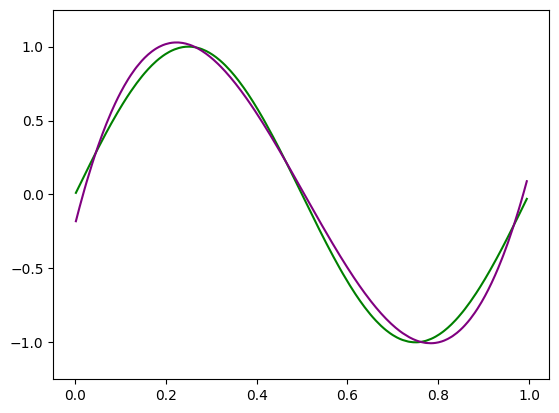

In [ ]:
#for degree 2 that ell the number of feautr then y cap=b0+b1x1+b2x1^2+b3x2+b4x2^2 for x1 x1^2 x2 x2^2
#it is more complex due the number of parameters which we are learning
# PR is learning model in terms of beta but non-linear in terms of x but overall it is said to be linear as we discuss in respect of beta and only the feature space is changing as non-linearity is being added

from sklearn.preprocessing import PolynomialFeatures
#we want preprocessing for features in this case they will be X, X^2,X^3
poly_=PolynomialFeatures(degree=3)
#X_sub_poly represtnt 3 features with 50 samples
X_sub_poly=poly_.fit_transform(X_sub_train[:,np.newaxis])
print(X_sub_poly.shape)
#conversion is of 500 samples
X_poly=poly_.fit_transform(X_[:,np.newaxis])
L1_=LinearRegression()
#used to calculate beta
#at the time of prediction polynomial features are required
L1_.fit(X_sub_poly,YY_sub_train)
pred_=L1_.predict(X_poly)
plt.plot(X_,Y_,color='green')
plt.plot(X_,pred_,color='purple')
plt.ylim(-1.25,1.25)
plt.scatter(X_sub_train,YY_sub_train,s=50,facecolors='none')
plt.show()
#the points in circles (50) represents a scatter plot
#to match the curvature of features we use polynomial regeression
#polynomial regression is more complex than linear as it has more parameters to learn
#prediction error is more in Normal Linear Regression

#overfitting condition-looking at training data so to minimize training error by satisfying all the training points complexity of model increases but test error is still there
#as samples decreases and degree increases the training error decreases
#high test error
#overfitting can be handled by increasing the number of training samples or to reduct the complexity of model in this case by decreasing degree

#Underfitting when complexity of the model is very less such that training and testing error is very high
#Variance (difference between training and testing error) will be high in overfitting model
#Bias is more for underfitting model.





In [ ]:
#dataset is divided into 3 train,test and validate (used to test train and is used to test overfitting and underfitting)


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('Iris.csv')
df.drop('Id', axis=1, inplace=True)  # Corrected axis=1
print(df)

columns = df.columns.tolist()  # tolist is used to create a list
# columns length is 5: 4 features and 1 target
Classes_ = (df['Species'].unique()).tolist()
# .unique() is used to find unique entries in the column to find the number of classes
# Creates a list of classes
#result = (df.loc[df['Species'] == Classes_[0], columns[0]])
def get_pdf_par(attribute,class_):
  #
    result = (df.loc[df['Species'] == class_, attribute])
    mean_ = np.mean(result)
    var_ = np.std(result)**2
    return mean_, var_

def get_likelihood(value_,mean_,var_):

     r_=(1/(np.sqrt(2*np.pi*var_)))*np.exp(-(value_-mean_)**2/(2*var_))
     return r_
#dictionary
T_={'SepalLengthCm':5, 'SepalWidthCm':2, 'PetalLengthCm':3.5, 'PetalWidthCm':1}
print(T_.keys())
S_=[]#empty matrix
for j in Classes_:#it will run for 3 times as we have three classes
  L=0
  for i in (T_.keys()):#for features and this will run for 4 times as we have 4 features
    m_,v_=get_pdf_par(i,j)
    likelihood_=np.log(get_likelihood(T_[i],m_,v_))
    L=likelihood_+L
  S_.append(L_)#it will have one value
ind_1=np.where(S_==np.max(S_))
predicetd_class=Classes_[int(ind_1[0])]#int(ind_1[0] will give the value 1

#use the above code for Naive Bayes Classification

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
#NAIVE BAYES CLASSIFIER
import pandas as pd
import numpy as np

# The dataset
df_2 = pd.DataFrame({
    'Weather': ['clear', 'clear', 'clear', 'clear', 'clear', 'rainy', 'rainy', 'rainy', 'rainy', 'rainy', 'snowy', 'snowy', 'snowy', 'snowy', 'snowy'],
    'Time of week': ['workday', 'workday', 'workday', 'weekend', 'weekend', 'weekend', 'workday', 'workday', 'weekend', 'weekend', 'workday', 'workday', 'weekend', 'weekend', 'weekend'],
    'Time of day': ['morning', 'lunch', 'evening', 'morning', 'evening', 'lunch', 'morning', 'lunch', 'morning', 'evening', 'morning', 'lunch', 'evening', 'lunch', 'morning'],
    'Traffic jam': ['yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes']
})

# Defining the features and the target
features = ['Weather', 'Time of week', 'Time of day']
target = 'Traffic jam'

# Get the unique classes from the target variable (Traffic jam)
Classes_ = df_2[target].unique().tolist()

# Function to calculate the conditional probability P(feature_value | class)
def get_conditional_prob(feature, feature_value, class_):
    class_subset = df_2[df_2[target] == class_]
    feature_count = class_subset[feature].value_counts().get(feature_value, 0)
    total_class_count = len(class_subset)
    return (feature_count + 1) / (total_class_count + len(df_2[feature].unique()))  # Using Laplace smoothing

# Function to calculate the prior probability P(class)
def get_prior_prob(class_):
    return len(df_2[df_2[target] == class_]) / len(df_2)

# Dictionary for the new input values (e.g., test case)
T_ = {'Weather': 'rainy', 'Time of week': 'weekend', 'Time of day': 'morning'}

# Naive Bayes calculation
S_ = []  # To store the log-likelihood for each class
for class_ in Classes_:
    L = np.log(get_prior_prob(class_))  # Start with the log of the prior probability
    for feature in features:
        conditional_prob = get_conditional_prob(feature, T_[feature], class_)
        L += np.log(conditional_prob)  # Add log of conditional probability for each feature
    S_.append(L)  # Store the log-likelihood for this class

# Predict the class with the highest likelihood
ind_1 = np.argmax(S_)
predicted_class = Classes_[ind_1]

print("Predicted class:", predicted_class)


Predicted class: no


In [ ]:
pip install pydotplus


In [ ]:
!pip install pydotplus

In [ ]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz'

from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data  # Corrected here
from sklearn.tree import export_graphviz


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
##loading dataset##
df=pd.read_csv('Iris.csv')
df.drop('Id',axis=1,inplace=True)
X_=df.iloc[:,:-1]#all the rows
Y_=df.iloc[:,-1]#all the columns excluding last one
print(df)
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y_,test_size=0.3,random_state=1)#random state can be any number
print(df)

##Decision tree##
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz"
from sklearn.tree import DecisionTreeClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
min_sample_ = 30
tree = DecisionTreeClassifier(criterion='entropy',
                min_samples_split=min_sample_,
                              random_state=1)

#max_depth = 2
#tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_sample_,
 #                           max_depth=max_depth,random_state=1)

tree.fit(X_train, Y_train)
dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa',
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['SepalLengthCm',
                                          'Sepal Width',
                                          'petal lenght',
                                          'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('split_tree_{}.png'.format(min_sample_))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]
     SepalLengthCm  SepalWidthCm  PetalL

True